# Домашне завдання модуль 5
## Частина друга

У другій частині минулого домашнього завдання ми вирішували диференціальні рівняння та будували графіки. Продовжуємо працювати над цією домашньою роботою далі.

Необхідно методом найменших квадратів:

*   для набору даних графіка функції `S(t)` отримати рівняння виду `S(t)=S0e−αt`
*   для набору даних графіка функції `I(t)` отримати рівняння виду ` I(t)=(I0+αS0t)e −αt`

Для рівняння `R(t) ` графік функції буде `R(t)=N−S(t)−I(t)`

*   Побудувати усі три графіка `S(t), I(t)I(t) и R(t)R(t) ` на одній області відображення отримані методом найменших квадратів
*   Знайти час `t max` у якому число інфекційних індивідів максимально. Треба за допомогою методу **minimize_scalar** знайти, коли функція `I(t)` досягає свого максимуму.

In [1]:
from scipy.integrate import solve_ivp
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt
from scipy.optimize import leastsq, curve_fit, minimize_scalar
import numpy as np

## Для набору даних графіка функції S(t) отримати рівняння виду S(t)=S0e−αt

In [2]:
alpha = 0.5
beta = 0.3
N = 1000000
S0 = 990000
I0 = 7000
R0 = 3000
t0, tf = 0, 25

In [3]:
def dsdt(t, s):
    return -alpha * s

In [4]:
solution_s = solve_ivp(dsdt, (t0, tf), [S0], dense_output=True)
solution_s

  message: 'The solver successfully reached the end of the integration interval.'
     nfev: 98
     njev: 0
      nlu: 0
      sol: <scipy.integrate._ivp.common.OdeSolution object at 0x7f21ad980ca0>
   status: 0
  success: True
        t: array([ 0.        ,  0.11486984,  1.26356819,  3.06043758,  4.8157449 ,
        6.57363058,  8.33135596, 10.08909132, 11.84682607, 13.60456089,
       15.36229578, 17.12003086, 18.87776637, 20.63550293, 22.39324202,
       24.15098721, 25.        ])
 t_events: None
        y: array([[9.90000000e+05, 9.34741505e+05, 5.26338915e+05, 2.14449863e+05,
        8.92016780e+04, 3.70563463e+04, 1.53952532e+04, 6.39600686e+03,
        2.65724217e+03, 1.10395999e+03, 4.58643792e+02, 1.90545047e+02,
        7.91625391e+01, 3.28883086e+01, 1.36635268e+01, 5.67652784e+00,
        3.71298656e+00]])
 y_events: None

In [5]:
t_s, y_s = solution_s.t, solution_s.y[0]

In [6]:
def func_s(t_s, S0, alpha):
    return S0 * np.exp(-alpha * t_s)

In [7]:
def diff_s(p_s, y_s, t_s):
    S0, alpha = p_s
    return y_s - func_s(t_s, S0, alpha)

In [8]:
p0 = (S0, alpha)
aprx_s, _ = leastsq(diff_s, p0, args=(y_s, t_s))

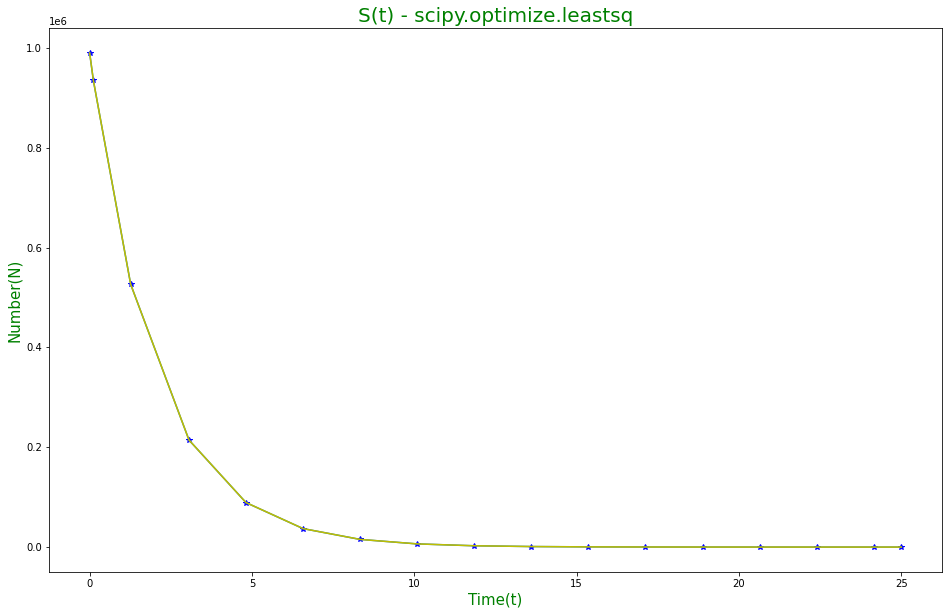

In [9]:
plt.rcParams["figure.figsize"] = (16, 10)
plt.plot(t_s, y_s, 'b*')
plt.plot(t_s, func_s(t_s, aprx_s[0], aprx_s[1]))
plt.plot(t_s, y_s, color='y')
plt.title('S(t) - scipy.optimize.leastsq', fontsize=20, color='g')
plt.xlabel('Time(t)', fontsize=15, color="g") 
plt.ylabel('Number(N)', fontsize=15, color="g") 
plt.show()

## Для набору даних графіка функції I(t) отримати рівняння виду I(t)=(I0+αS0t)e −αt

In [12]:
def didt(t, i):    
    return alpha * solution_s.sol(t) - beta * i

In [13]:
solution_i = solve_ivp(didt, (t0, tf), [I0], dense_output=True)
solution_i

  message: 'The solver successfully reached the end of the integration interval.'
     nfev: 80
     njev: 0
      nlu: 0
      sol: <scipy.integrate._ivp.common.OdeSolution object at 0x7f21ad83b6d0>
   status: 0
  success: True
        t: array([0.00000000e+00, 1.42016636e-02, 1.56218300e-01, 1.46534293e+00,
       3.30463452e+00, 5.49012015e+00, 8.32920731e+00, 1.14496758e+01,
       1.45701443e+01, 1.76449222e+01, 2.06395417e+01, 2.36032033e+01,
       2.50000000e+01])
 t_events: None
        y: array([[  7000.        ,  13960.24492701,  79326.36974353,
        409578.08332734, 446699.01195851, 319077.83028019,
        165571.99131376,  71966.74863635,  29712.58392623,
         12130.57394035,   5009.75291414,   2075.26330114,
          1367.85128541]])
 y_events: None

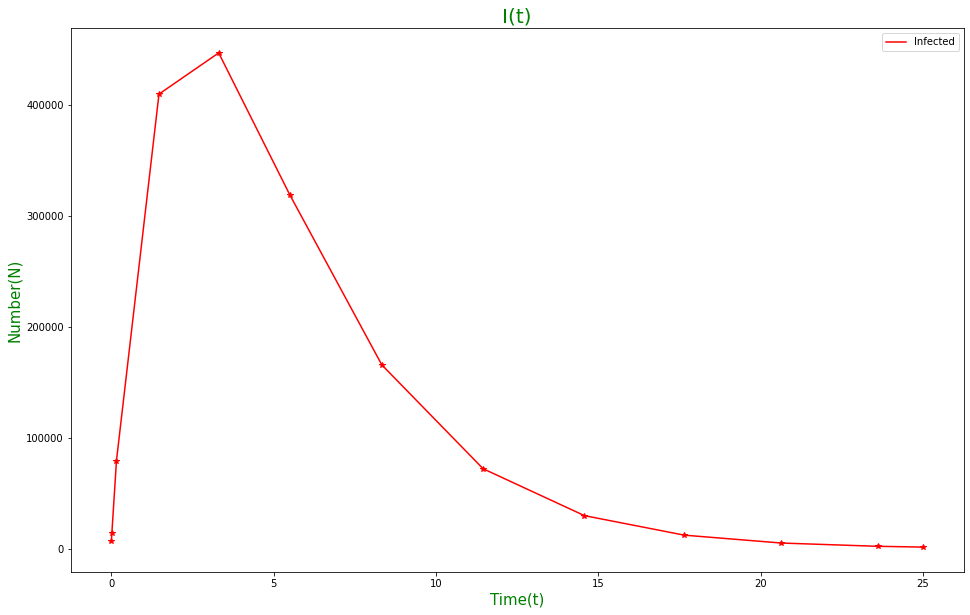

In [14]:
plt.rcParams["figure.figsize"] = (16, 10)
plt.plot(solution_i.t, solution_i.y[0], '*', color='r')
plt.plot(solution_i.t, solution_i.sol(solution_i.t)[0], color='r', label='Infected')
plt.title('I(t)', fontsize=20, color='g')
plt.xlabel('Time(t)', fontsize=15, color="g") 
plt.ylabel('Number(N)', fontsize=15, color="g") 
plt.legend()
plt.show()

In [15]:
t_i, y_i = solution_i.t, solution_i.y[0]

In [16]:
def func_i(t_i, S0, I0, alpha):
    return (I0 + alpha * S0 * t_i) * np.exp((-1) * alpha * t_i)

In [17]:

def diff_i(p_i, y_i, t_i):
    S0, I0, alpha = p_i
    return y_i - func_i(t_i, S0, I0, alpha)

In [18]:
p0 = (S0, I0, alpha)
aprx_i, _ = leastsq(diff_i, p0, args=(y_i, t_i))
aprx_i

array([1.25281252e+06, 8.08519969e+03, 3.83762944e-01])

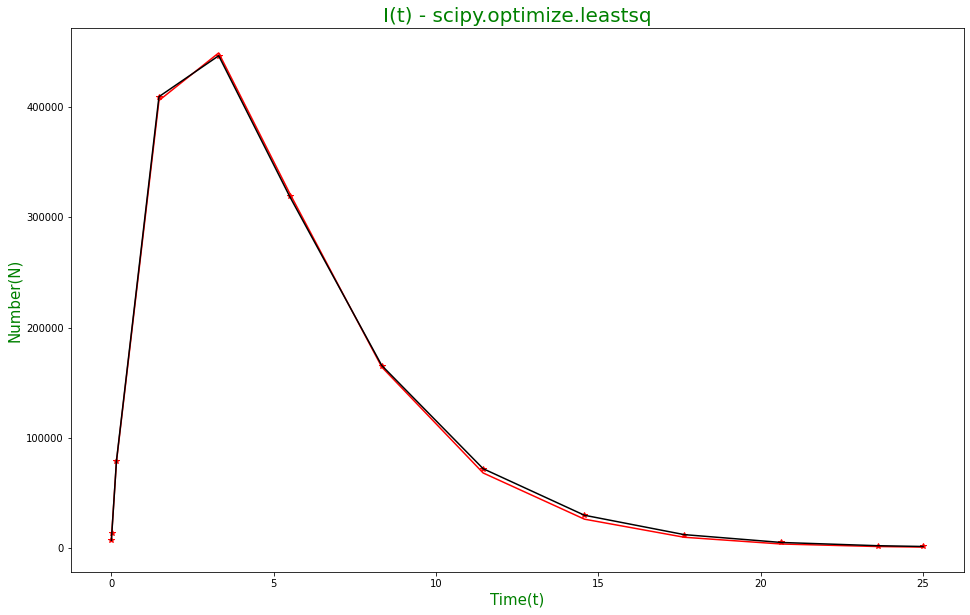

In [19]:
plt.rcParams["figure.figsize"] = (16, 10)
plt.plot(t_i, y_i, 'r*')
plt.plot(t_i, func_i(t_i, aprx_i[0], aprx_i[1], aprx_i[2]), 'r-')
plt.plot(t_i, y_i, color='k')
plt.title('I(t) - scipy.optimize.leastsq', fontsize=20, color='g')
plt.xlabel('Time(t)', fontsize=15, color="g") 
plt.ylabel('Number(N)', fontsize=15, color="g") 
plt.show()

## Побудувати усі три графіка S(t), I(t)I(t) и R(t)R(t) на одній області відображення отримані методом найменших квадратів

In [20]:

time = np.linspace(0, 25, 1500)
def S_t(time):
    return aprx_s[0] * np.exp(-aprx_s[1] * time)

def I_t(time):
    return (aprx_i[1] + aprx_i[2] * aprx_i[0] * time) * np.exp((-1) * aprx_i[2] * time)

def R_t(time):
    return N - S_t(time) - I_t(time)

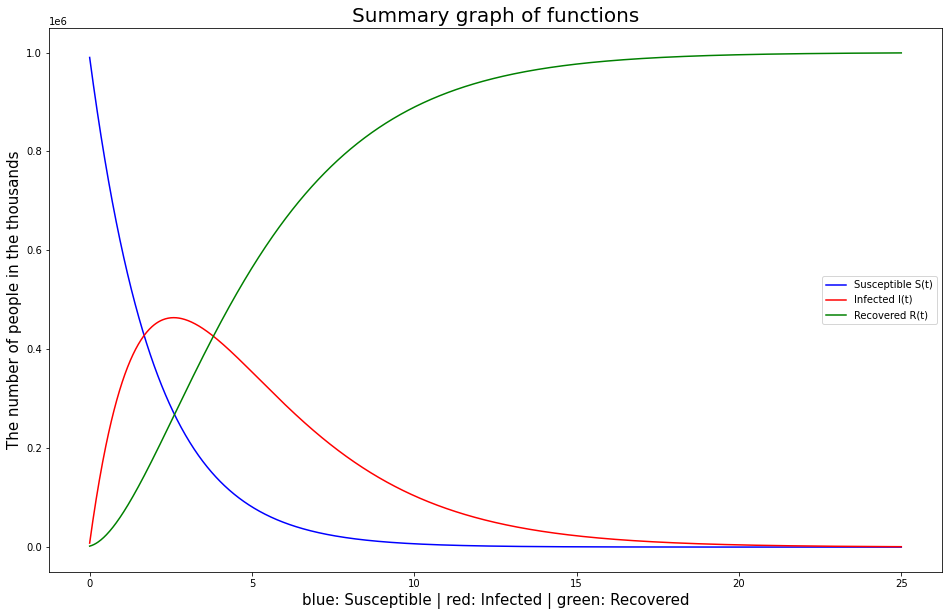

In [21]:

plt.rcParams["figure.figsize"] = (16, 10)
plt.plot(time, S_t(time), 'b', label='Susceptible S(t)')
plt.plot(time, I_t(time), 'r', label='Infected I(t)')
plt.plot(time, R_t(time), 'g', label='Recovered R(t)')
plt.title('Summary graph of functions', fontsize=20, color='k')
plt.xlabel('blue: Susceptible | red: Infected | green: Recovered', fontsize=15, color="k") 
plt.ylabel('The number of people in the thousands', fontsize=15, color="k") 
plt.legend()
plt.show()

## Знайти час t max у якому число інфекційних індивідів максимально. Треба за допомогою методу minimize_scalar знайти, коли функція I(t) досягає свого максимуму.

In [22]:
result = minimize_scalar(lambda x: -I_t(x), bounds=(0, 5))
result.x

2.588958601415805